In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy
from keras import models,layers
from keras.utils import to_categorical
from keras import optimizers

Using TensorFlow backend.


In [2]:
# loading the dataset
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [0]:
labels=['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

[4]


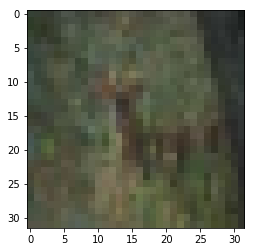

In [5]:
#explore data
print(ytrain[10])
plt.imshow(xtrain[10])
plt.show()

In [0]:
# conver the pixel values in float
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
# scale the images
xtrain /= 255  # ths is eqvalent to xtrain = xtrain/255 
xtest /= 255

In [7]:
# Convert class vectors to binary class matrices.
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
print(ytrain.shape)
print(ytest.shape)


(50000, 10)
(10000, 10)


In [8]:
print(xtrain[10])

[[[0.20784314 0.25490198 0.20784314]
  [0.21176471 0.24705882 0.20392157]
  [0.21960784 0.23529412 0.19607843]
  ...
  [0.18431373 0.2        0.19607843]
  [0.16078432 0.1764706  0.17254902]
  [0.09411765 0.10980392 0.10588235]]

 [[0.18039216 0.23137255 0.16078432]
  [0.20784314 0.24313726 0.1764706 ]
  [0.21176471 0.23137255 0.17254902]
  ...
  [0.16470589 0.18039216 0.1764706 ]
  [0.15294118 0.16862746 0.16470589]
  [0.10980392 0.1254902  0.12156863]]

 [[0.1764706  0.23137255 0.14901961]
  [0.19607843 0.23529412 0.16078432]
  [0.18039216 0.20392157 0.13333334]
  ...
  [0.14901961 0.16470589 0.16078432]
  [0.14117648 0.15686275 0.15294118]
  [0.11372549 0.12941177 0.1254902 ]]

 ...

 [[0.2784314  0.3254902  0.25882354]
  [0.2901961  0.3254902  0.25882354]
  [0.3137255  0.33333334 0.2627451 ]
  ...
  [0.2        0.21176471 0.12941177]
  [0.18039216 0.19215687 0.13333334]
  [0.19215687 0.19607843 0.16078432]]

 [[0.29411766 0.32156864 0.2627451 ]
  [0.30980393 0.33333334 0.27058825]


In [9]:
ytrain[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',
                 input_shape=xtrain.shape[1:]))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))  # Drops 25% pixels, which are not important.

model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())  # it converts a 2D image (eg. 12,12) into a 1D vector (1,144)
model.add(layers.Dense(512)) # Adding a hidden layer with 512 neurons, fully connected layer
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))  # this is the actual output layer
model.add(layers.Activation('softmax')) 

# initiate RMSprop optimizer
opt = optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
model.fit(xtrain,ytrain,validation_split=0.1,verbose=True,epochs=100,batch_size=1000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 13s 299us/step - loss: 2.1888 - acc: 0.1809 - val_loss: 2.0424 - val_acc: 0.2802
Epoch 2/100
45000/45000 [==============================] - 6s 134us/step - loss: 2.0119 - acc: 0.2652 - val_loss: 1.9365 - val_acc: 0.3070
Epoch 3/100
45000/45000 [==============================] - 6s 134us/step - loss: 1.9028 - acc: 0.3146 - val_loss: 1.8294 - val_acc: 0.3556
Epoch 4/100
45000/45000 [==============================] - 6s 134us/step - loss: 1.8280 - acc: 0.3424 - val_loss: 1.7985 - val_acc: 0.3654
Epoch 5/100
45000/45000 [==============================] - 6s 134us/step - loss: 1.7748 - acc: 0.3659 - val_loss: 1.7169 - val_acc: 0.3914
Epoch 6/100
45000/45000 [==============================] - 6s 134us/step - loss: 1.7323 - acc: 0.3813 - val_loss: 1.6897 - val_acc: 0.4058
Epoch 7/100
45000/4500

In [0]:
# check performance on test
scores = model.evaluate(xtest, ytest, verbose=1) 
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 144us/step
Test loss: 0.8888397757530212
Test accuracy: 0.6919


So the model's final accuracy on the TEST data is 69%